<a href="https://colab.research.google.com/github/rporeddi/Python-Projects/blob/master/HIV_analysis_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("indicator_hiv_estimated_prevalence.xlsx")

In [ ]:
df1.head()

,Estimated HIV Prevalence% - (Ages 15-49),1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN


## To get the continent names from the given country i used pycountry-convert. For that i installed the functionality as shown below

In [ ]:
pip install pycountry-convert

     |████████████████████████████████| 10.0MB 6.9MB/s 
     |████████████████████████████████| 235kB 50.9MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=d99ef04e070de4f0ea06edc30ac6068e5bf49cdf4cb7d7c01fad5e1d02d9449a
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.0.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.0.3 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


## Below function is used to generate the continent names for a given country
pycountry-convert can be used to generate the country code, continent code and continent names from the country name. so we use alpha2 conversions to get the country code from the country name and then get the continent code from the country code and then finally generate continent name from the continent code

In [ ]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [ ]:

# Example
#country_name = 'Cote dIvoire'
#print(country_to_continent(country_name))

In [ ]:
df2 = df1.copy()  ## creating a copy of the dataframe to manipulate the data

In [ ]:
df2.rename(columns={'Estimated HIV Prevalence% - (Ages 15-49)': 'Country'}, inplace=True)

In [ ]:
df2.head()

,Country,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN


In [ ]:
countries_list = list (df2.Country)   ### creating a list of countries from the dataframe
countries_list[:3]

['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia']

## pycountry-convert has a limitation that it cannot extract islands and territores continent name so to handle this i seperated the countries from islands, territores. 

In [ ]:
c_list = []
error_list = []
for i in countries_list:
  try:
    a = country_to_continent(i)
    c_list.append(i)
  except:
    error_list.append(i)

In [ ]:
#import re

In [ ]:
#for i in range (0, len(error_list)):  
#  d = re.sub(r'\bSt. \b', 'Saint ', error_list[i], flags=re.IGNORECASE)  
#  error_list[i] = d

In [ ]:
#for i in range (0, len(error_list)):
#  c = re.sub(r'\bIs\b', 'Islands', error_list[i], flags=re.IGNORECASE)
#  error_list[i] = c

In [ ]:
#for j in range (0, len(error_list)):
#  e = re.sub(r'\bSt.-\b', 'Saint ', error_list[j], flags=re.IGNORECASE)
#  error_list[j] = e

In [ ]:
#for k in range (0, len(error_list)):
#  f = re.sub("[\(\[].*?[\)\]]", "", error_list[k])
#  error_list[k] = f

## for the countries list using the pycountry-convert extracted their continent names

In [ ]:
con_dict = {}
for i in c_list:
  cont = country_to_continent(i)
  con_dict[i] = cont

## For the territories and islands i mentioned the continents as "other"

In [ ]:
other_dict = {}
for j in error_list:
  other_dict[j] = "other"

## So from the above dictonaries of country and continent extracted the continent list

In [ ]:
continent_list = []
for i in countries_list:
  if i in con_dict.keys():
    continent_list.append(con_dict.get(i))
  elif i in other_dict.keys():
    continent_list.append(other_dict.get(i))

In [ ]:
len(continent_list)

275

## Now appending the continent names to the dataframe. To maintain the order we created dictonary for the country and their equivalent continent names. so we extracted the continents from the dictonary and appended it to the data frame.

In [ ]:
df2['Continent'] = continent_list

In [ ]:
df2

,Country,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continent
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,Asia
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
271,Sark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
272,Chinese Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
273,Saint Eustatius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other


## exporting the above data frame to "HIV_estimated_prevalence_by_continent.csv" file

In [ ]:
df2.to_csv("HIV_estimated_prevalence_by_continent.csv")

#Find the country/region in each continent that has the lowest average HIV estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011. 

In [ ]:
average_df2 = df2.copy()   ##creating a copy of the dataframe

## calulating the average prevalence from 2000 - 2011 and creating a new column for these values

In [ ]:
cols = [2000,2001,2002,2003,2004,2005,2006,2007,2008,'2009','2010','2011']
average_df2['average'] = average_df2[cols].astype(float).mean(axis=1)

In [ ]:
average_df2

,Country,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continent,average
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,Asia,0.060000
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN,Africa,0.082222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,NaN
271,Sark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN
272,Chinese Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN
273,Saint Eustatius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN


## seperating the country, continent and average values for finding the highest and lowest from each continent

In [ ]:
df3 = average_df2[["Country", "Continent", "average"]].copy()

## Grouped the data into different continents and using nlargest functionality to find the highest average from each group

In [ ]:
max_average_df = df3.groupby(['Continent']).apply(lambda grp: grp.nlargest(1, 'average'))
max_country = list(max_average_df['Country'])
max_average_df

,,Country,Continent,average
Continent,,,,
Africa,28,Botswana,Africa,25.208333
Asia,224,Thailand,Asia,1.450000
Europe,70,Estonia,Europe,1.008333
North America,16,Bahamas,North America,3.000000
Oceania,174,Papua New Guinea,Oceania,0.700000
South America,94,Guyana,South America,1.208333
other,53,Cote d'Ivoire,other,4.758333


In [ ]:
#max_average_df = df3.groupby('Continent')\
#  .apply(lambda group: group[group.average == group.average.max()])\
#  .reset_index(drop=True)
#max_average_df

##Grouped the data into different continents and using nsmallest functionality to find the highest average from each group

In [ ]:
min_average_df = df3.groupby(['Continent']).apply(lambda grp: grp.nsmallest(1, 'average'))
min_country = list(min_average_df['Country'])
min_average_df

,,Country,Continent,average
Continent,,,,
Africa,65,Egypt,Africa,0.060000
Asia,1,Afghanistan,Asia,0.060000
Europe,54,Croatia,Europe,0.060000
North America,55,Cuba,North America,0.103333
Oceania,74,Fiji,Oceania,0.083333
South America,26,Bolivia,South America,0.225000
other,122,Lao,other,0.148333


In [ ]:
import matplotlib.pyplot as plt

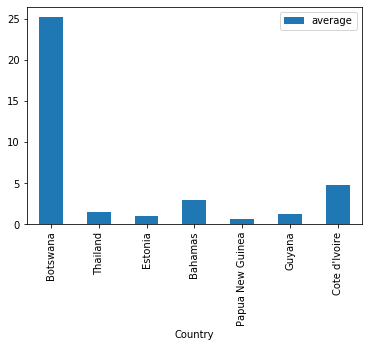

In [ ]:
max_average_df.plot(kind='bar',x='Country', y='average')
plt.show()

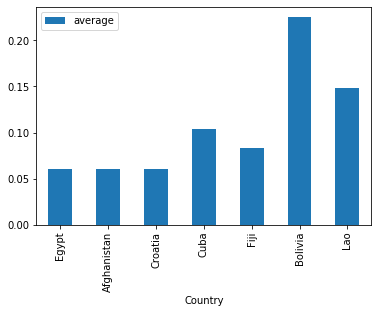

In [ ]:
min_average_df.plot(kind='bar',x='Country', y='average')
plt.show()

In [ ]:
cont_average = df2.copy()

In [ ]:
cont_average_df = cont_average.groupby(by='Continent').mean()  ## calculating the average prevaliance of each country

In [ ]:
new_cont_average_df= cont_average_df[[2000,2001,2002,2003,2004,2005,2006,2007,2008,'2009','2010','2011']]
new_cont_average_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Continent,,,,,,,,,,,,
Africa,5.696444,5.732000,5.707556,5.652000,5.572889,5.492889,5.406222,5.337333,5.279556,4.985532,4.942979,4.865000
Asia,0.231613,0.229677,0.220000,0.220645,0.222903,0.219032,0.217097,0.215484,0.218065,0.235000,0.235862,0.236667
Europe,0.193714,0.210857,0.223429,0.246286,0.253143,0.264571,0.270286,0.277143,0.280000,0.286471,0.293529,0.293529
North America,1.050588,1.038824,1.027059,1.027059,1.029412,1.035294,1.041176,1.029412,1.052941,1.000000,0.993750,0.987500
Oceania,0.165000,0.190000,0.215000,0.250000,0.250000,0.275000,0.275000,0.300000,0.300000,0.265000,0.265000,0.275000
South America,0.563636,0.563636,0.554545,0.563636,0.536364,0.527273,0.518182,0.509091,0.531818,0.550000,0.533333,0.525000
other,3.620000,3.453333,3.320000,3.166667,3.033333,2.833333,2.700000,2.600000,2.466667,2.300000,2.266667,2.200000


##from the above dataframe using max function got the highest average for each continent

In [ ]:
a = new_cont_average_df.max(axis=1)

In [ ]:
cont_max_average = a.to_frame(name = "maximum_average")
cont_max_average

,maximum_average
Continent,
Africa,5.732000
Asia,0.236667
Europe,0.293529
North America,1.052941
Oceania,0.300000
South America,0.563636
other,3.620000


##from the above dataframe using min function got the lowesr average for each continent

In [ ]:
b = new_cont_average_df.min(axis=1)

In [ ]:
cont_min_average = b.to_frame(name = "minimum_average")
cont_min_average

,minimum_average
Continent,
Africa,4.865000
Asia,0.215484
Europe,0.193714
North America,0.987500
Oceania,0.165000
South America,0.509091
other,2.200000


## Create a bar chart to show the highest average HIV estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011 in each continent 

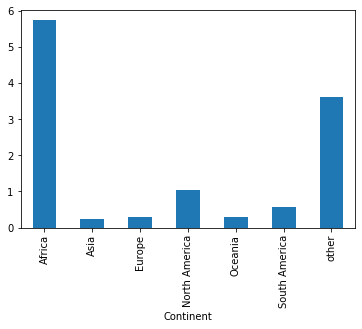

In [ ]:
new_cont_average_df.max(axis=1).plot(kind='bar')

##Create a bar chart to show the lowest average HIV estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011 in each continent 

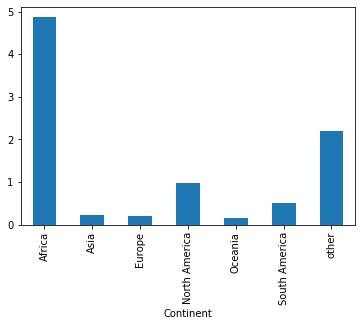

In [ ]:
new_cont_average_df.min(axis=1).plot(kind='bar')

In [ ]:
import seaborn as sns

In [ ]:
list(new_cont_average_df.min(axis=1))

[4.864999999999999,
 0.2154838709677419,
 0.1937142857142857,
 0.9875,
 0.165,
 0.509090909090909,
 2.1999999999999997]

In [ ]:
average_cont = cont_max_average.copy() 
average_cont['minimum_average'] = list(new_cont_average_df.min(axis=1))

In [ ]:
average_cont

,maximum_average,minimum_average
Continent,,
Africa,5.732000,4.865000
Asia,0.236667,0.215484
Europe,0.293529,0.193714
North America,1.052941,0.987500
Oceania,0.300000,0.165000
South America,0.563636,0.509091
other,3.620000,2.200000


##Create an overlaid bar chart to show the highest and lowest average HIV estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011 in each continent. 

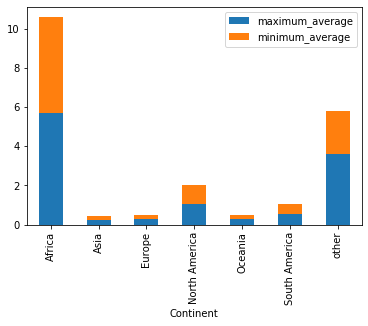

In [ ]:
average_cont.plot(kind="bar", stacked=True)

In [ ]:
new_average_df2 = average_df2[['Country', 2000,2001,2002,2003,2004,2005,2006,2007,2008,'2009','2010','2011']]
new_average_df2

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Sark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Chinese Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Saint Eustatius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Select a country/region that is different from the average highest or lowest HIV estimated prevalence of people ages from 15 to 49 from year 2000 to 2011 from each continent, then create an overlaid line chart for the selected country/region, the average highest and lowest HIV estimated prevalence of people ages from 15 to 49 from year 2000 to 2011 for each continent 

In [ ]:
country_new_df = df2.groupby('Continent', group_keys=False).apply(pd.DataFrame.sample, n=1)
other_countries = list(country_new_df['Country'])
while other_countries == max_country or other_countries == min_country:
  country_new_df = df2.groupby('Continent', group_keys=False).apply(pd.DataFrame.sample, n=1)
  other_countries = list(country_new_df['Country'])

#other_countries
count_new_df2=country_new_df[['Country', 2000,2001,2002,2003,2004,2005,2006,2007,2008,'2009','2010','2011','Continent']].copy()
count_new_df2

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continent
114,Kenya,9.00,8.40,7.90,7.50,7.1,6.8,6.6,6.4,6.3,6.2,6.2,6.20,Africa
44,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Asia
32,Bulgaria,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.10,Europe
95,Haiti,2.80,2.60,2.50,2.30,2.2,2.1,2.1,2.0,2.0,1.9,1.9,1.80,North America
168,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania
10,Argentina,0.40,0.40,0.40,0.40,0.4,0.4,0.4,0.4,0.5,0.4,0.4,0.40,South America
187,St. Barthélemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other


In [ ]:
max_avg = list(average_cont['maximum_average'])
min_avg = list(average_cont['minimum_average'])
count_new_df2['maximum_average'] = max_avg
count_new_df2['minimum_average'] = min_avg
count_new_df2.reset_index(drop=True)
#count_new_df2 = count_new_df2.set_index('Continent')

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continent,maximum_average,minimum_average
0,Kenya,9.00,8.40,7.90,7.50,7.1,6.8,6.6,6.4,6.3,6.2,6.2,6.20,Africa,5.732000,4.865000
1,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Asia,0.236667,0.215484
2,Bulgaria,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.10,Europe,0.293529,0.193714
3,Haiti,2.80,2.60,2.50,2.30,2.2,2.1,2.1,2.0,2.0,1.9,1.9,1.80,North America,1.052941,0.987500
4,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,0.300000,0.165000
5,Argentina,0.40,0.40,0.40,0.40,0.4,0.4,0.4,0.4,0.5,0.4,0.4,0.40,South America,0.563636,0.509091
6,St. Barthélemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,3.620000,2.200000


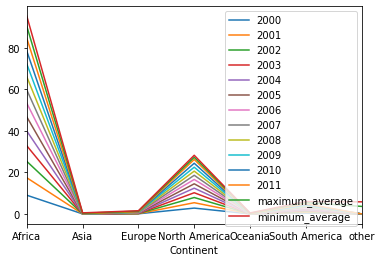

In [ ]:
count_new_df2.plot(x='Continent', y=[2000,2001,2002,2003,2004,2005,2006,2007,2008,'2009','2010','2011','maximum_average','minimum_average'], kind='line', stacked = True)

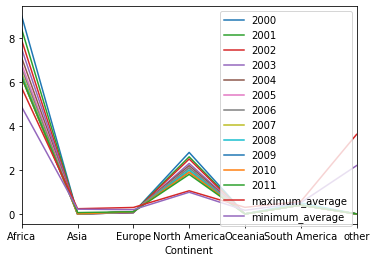

In [ ]:
ax = count_new_df2.plot(x="Continent", y=2000, kind="line", stacked=True)
count_new_df2.plot(x="Continent", y=2001, kind="line", ax=ax, color="C2", stacked=True)
count_new_df2.plot(x="Continent", y=2002, kind="line", ax=ax, color="C3", stacked=True)
count_new_df2.plot(x="Continent", y=2003, kind="line", ax=ax, color="C4", stacked=True)
count_new_df2.plot(x="Continent", y=2004, kind="line", ax=ax, color="C5", stacked=True)
count_new_df2.plot(x="Continent", y=2005, kind="line", ax=ax, color="C6", stacked=True)
count_new_df2.plot(x="Continent", y=2006, kind="line", ax=ax, color="C7", stacked=True)
count_new_df2.plot(x="Continent", y=2007, kind="line", ax=ax, color="C8", stacked=True)
count_new_df2.plot(x="Continent", y=2008, kind="line", ax=ax, color="C9", stacked=True)
count_new_df2.plot(x="Continent", y='2009', kind="line", ax=ax, color="C10", stacked=True)
count_new_df2.plot(x="Continent", y='2010', kind="line", ax=ax, color="C11", stacked=True)
count_new_df2.plot(x="Continent", y='2011', kind="line", ax=ax, color="C12", stacked=True)
count_new_df2.plot(x="Continent", y='maximum_average', kind="line", ax=ax, color="C13", stacked=True)
count_new_df2.plot(x="Continent", y='minimum_average', kind="line", ax=ax, color="C14", stacked=True)
plt.show()

## Write a Python progrma to calculate the average HIV estimated prevalence of people ages from 15 to 49 for each year in the dataset for each continent (you only need simply add the estimate prevalence number of all countries/regions and divided by the number of the countries/regions in the continent)

In [ ]:
group_df2 = df2.copy()

In [ ]:
group_df2.head()

,Country,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continent
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,Asia
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN,Africa


In [ ]:
new_group_df2 = group_df2.groupby('Continent').mean()
new_group_df2

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,0.037399,0.013923,0.011185,0.011773,0.011911,0.011477,0.010948,NaN,0.010400,NaN,NaN,1.898222,2.334667,2.824444,3.360000,3.895556,4.406667,4.849778,5.200889,5.449778,5.614222,5.696444,5.732000,5.707556,5.652000,5.572889,5.492889,5.406222,5.337333,5.279556,4.985532,4.942979,4.865000
Asia,0.012168,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,0.010175,NaN,NaN,0.116129,0.149677,0.170323,0.192258,0.208387,0.219355,0.219355,0.223871,0.234839,0.231613,0.231613,0.229677,0.220000,0.220645,0.222903,0.219032,0.217097,0.215484,0.218065,0.235000,0.235862,0.236667
Europe,0.014247,NaN,0.012948,0.014927,0.015850,NaN,0.032011,NaN,NaN,NaN,NaN,0.098857,0.104000,0.113143,0.120571,0.128571,0.134286,0.138857,0.154286,0.168571,0.178286,0.193714,0.210857,0.223429,0.246286,0.253143,0.264571,0.270286,0.277143,0.280000,0.286471,0.293529,0.293529
North America,0.039628,NaN,NaN,0.010653,NaN,NaN,0.012270,0.009510,NaN,NaN,NaN,0.637647,0.720000,0.810588,0.907059,0.989412,1.042353,1.042353,1.056471,1.056471,1.044706,1.050588,1.038824,1.027059,1.027059,1.029412,1.035294,1.041176,1.029412,1.052941,1.000000,0.993750,0.987500
Oceania,NaN,NaN,NaN,NaN,0.012683,NaN,NaN,0.011372,0.010175,NaN,NaN,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.090000,0.115000,0.115000,0.140000,0.165000,0.190000,0.215000,0.250000,0.250000,0.275000,0.275000,0.300000,0.300000,0.265000,0.265000,0.275000
South America,0.029865,0.011931,NaN,NaN,0.009743,0.012153,0.009689,NaN,NaN,NaN,NaN,0.442727,0.464545,0.495455,0.518182,0.527273,0.536364,0.554545,0.545455,0.563636,0.563636,0.563636,0.563636,0.554545,0.563636,0.536364,0.527273,0.518182,0.509091,0.531818,0.550000,0.533333,0.525000
other,0.066589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.553333,2.853333,3.153333,3.453333,3.686667,3.853333,3.920000,3.886667,3.820000,3.720000,3.620000,3.453333,3.320000,3.166667,3.033333,2.833333,2.700000,2.600000,2.466667,2.300000,2.266667,2.200000


## create a line chart for each continent to show the changes of the average HIV estimated prevalence from 1979 to 2011 

In [ ]:
year = new_group_df2.columns

In [ ]:
percentage = list(new_group_df2.iloc[0])
percentage1 = list(new_group_df2.iloc[1])
percentage2 = list(new_group_df2.iloc[2])
percentage3 = list(new_group_df2.iloc[3])
percentage4 = list(new_group_df2.iloc[4])
percentage5 = list(new_group_df2.iloc[5])
percentage6 = list(new_group_df2.iloc[6])

Text(0.5, 1.0, "Africa's average HIV estimated prevalence")

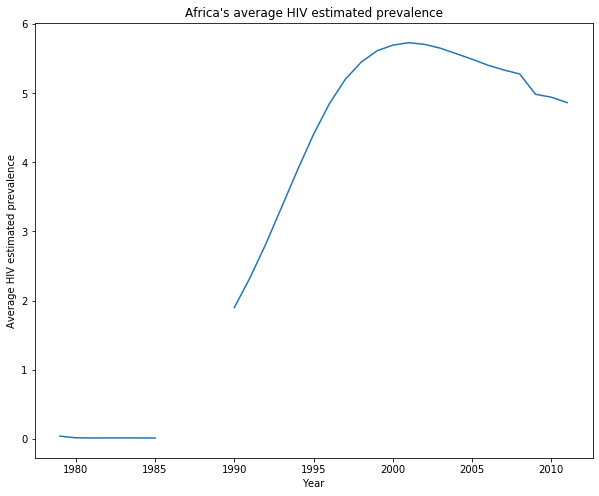

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(year,percentage)
plt.xlabel('Year')
plt.ylabel('Average HIV estimated prevalence')
plt.title("Africa's average HIV estimated prevalence")

In [ ]:
import seaborn as sns

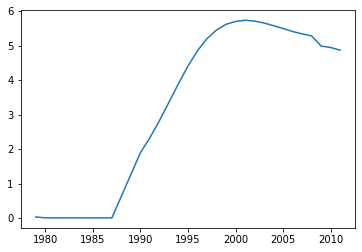

In [ ]:
#set(xlim=(1979,2011),ylim=(0,6))
sns.lineplot(x=year, y=percentage)
#set_xticks(range(1979,2011))

Text(0.5, 1.0, "Asia's average HIV estimated prevalence")

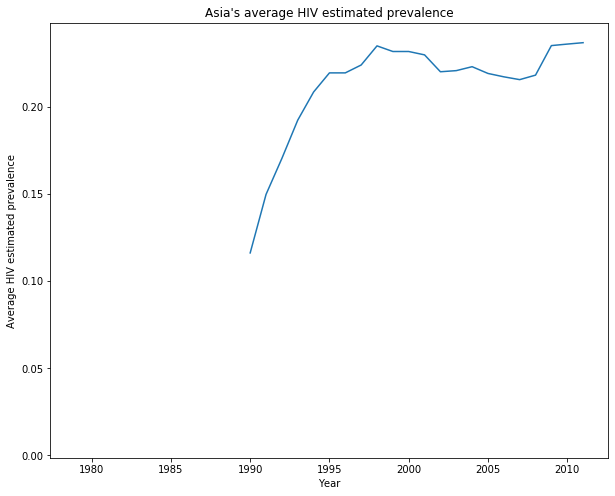

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(year,percentage1)
plt.xlabel('Year')
plt.ylabel('Average HIV estimated prevalence')
plt.title("Asia's average HIV estimated prevalence")

Text(0.5, 1.0, "Europe's average HIV estimated prevalence")

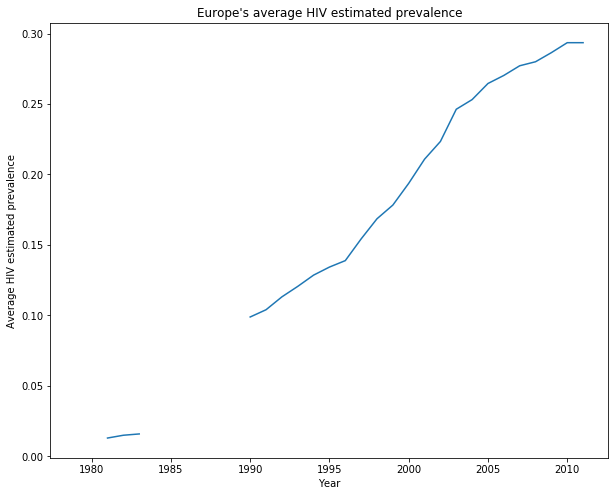

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(year,percentage2)
plt.xlabel('Year')
plt.ylabel('Average HIV estimated prevalence')
plt.title("Europe's average HIV estimated prevalence")

Text(0.5, 1.0, "North America's average HIV estimated prevalence")

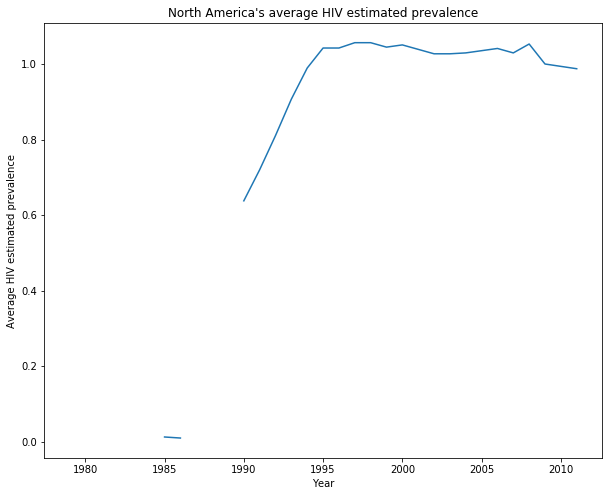

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(year,percentage3)
plt.xlabel('Year')
plt.ylabel('Average HIV estimated prevalence')
plt.title("North America's average HIV estimated prevalence")

Text(0.5, 1.0, "Oceania's average HIV estimated prevalence")

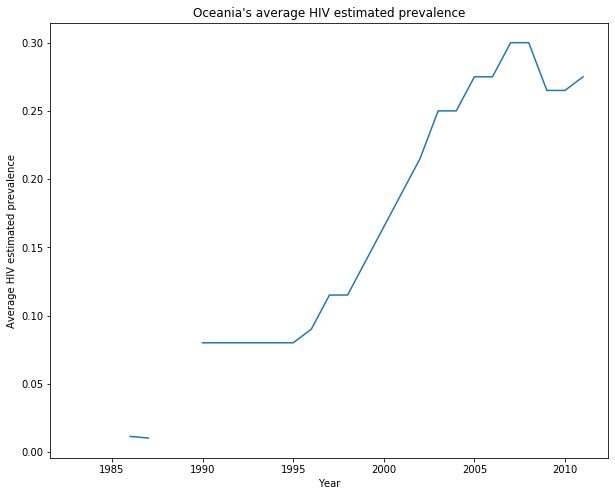

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(year,percentage4)
plt.xlabel('Year')
plt.ylabel('Average HIV estimated prevalence')
plt.title("Oceania's average HIV estimated prevalence")

Text(0.5, 1.0, "North America's average HIV estimated prevalence")

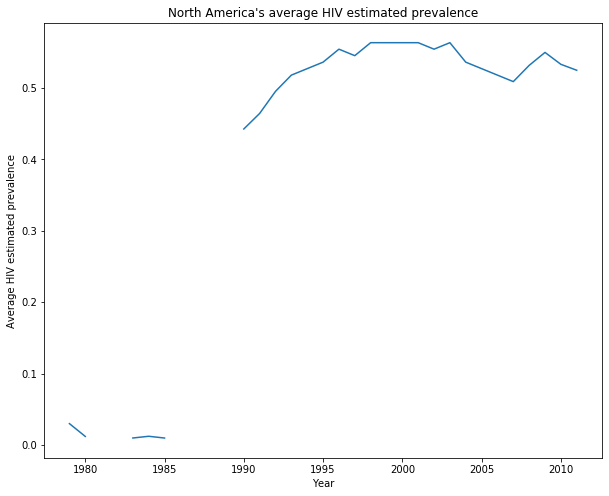

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(year,percentage5)
plt.xlabel('Year')
plt.ylabel('Average HIV estimated prevalence')
plt.title("North America's average HIV estimated prevalence")

Text(0.5, 1.0, "Other's average HIV estimated prevalence")

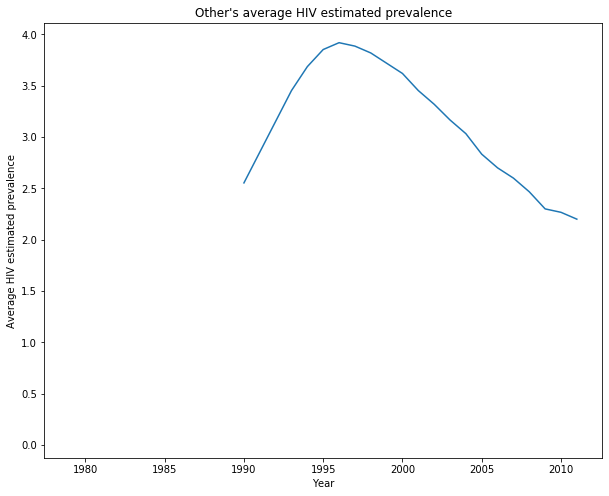

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(year,percentage6)
plt.xlabel('Year')
plt.ylabel('Average HIV estimated prevalence')
plt.title("Other's average HIV estimated prevalence")

##Create an overlaid line chart for all continents to show their changes of the average HIV estimated prevalence from 1979 to 2011

In [ ]:
graph_df = pd.DataFrame({'Africa':new_group_df2.iloc[0], 'Asia':new_group_df2.iloc[1], 'Europe':new_group_df2.iloc[2], 'North America':new_group_df2.iloc[3], 'Oceania':new_group_df2.iloc[4], 'South America':new_group_df2.iloc[5], 'Others':new_group_df2.iloc[6]}, index= year)

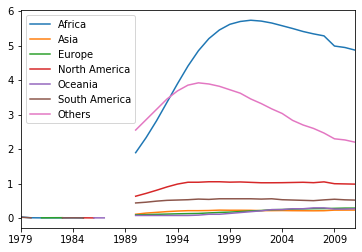

In [ ]:
graph_df.plot.line()

## Create two scatter plots to show the data (i.e. each country/region) in year 1990 and year 2010, respectively. The vertical axis in the scatter plot is the HIV estimated prevalence, and the horizontal axis is the corresponding year average HIV estimated prevalence in each continent, which you calculated above. Using different color to show data from different continent

In [ ]:
import matplotlib.pyplot
import pylab
import seaborn as sns

In [ ]:
df2_nea = df2.copy()

In [ ]:
df2_nea_grp= df2_nea.groupby('Continent').mean()
df2_nea_grp

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,0.037399,0.013923,0.011185,0.011773,0.011911,0.011477,0.010948,NaN,0.010400,NaN,NaN,1.898222,2.334667,2.824444,3.360000,3.895556,4.406667,4.849778,5.200889,5.449778,5.614222,5.696444,5.732000,5.707556,5.652000,5.572889,5.492889,5.406222,5.337333,5.279556,4.985532,4.942979,4.865000
Asia,0.012168,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,0.010175,NaN,NaN,0.116129,0.149677,0.170323,0.192258,0.208387,0.219355,0.219355,0.223871,0.234839,0.231613,0.231613,0.229677,0.220000,0.220645,0.222903,0.219032,0.217097,0.215484,0.218065,0.235000,0.235862,0.236667
Europe,0.014247,NaN,0.012948,0.014927,0.015850,NaN,0.032011,NaN,NaN,NaN,NaN,0.098857,0.104000,0.113143,0.120571,0.128571,0.134286,0.138857,0.154286,0.168571,0.178286,0.193714,0.210857,0.223429,0.246286,0.253143,0.264571,0.270286,0.277143,0.280000,0.286471,0.293529,0.293529
North America,0.039628,NaN,NaN,0.010653,NaN,NaN,0.012270,0.009510,NaN,NaN,NaN,0.637647,0.720000,0.810588,0.907059,0.989412,1.042353,1.042353,1.056471,1.056471,1.044706,1.050588,1.038824,1.027059,1.027059,1.029412,1.035294,1.041176,1.029412,1.052941,1.000000,0.993750,0.987500
Oceania,NaN,NaN,NaN,NaN,0.012683,NaN,NaN,0.011372,0.010175,NaN,NaN,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.090000,0.115000,0.115000,0.140000,0.165000,0.190000,0.215000,0.250000,0.250000,0.275000,0.275000,0.300000,0.300000,0.265000,0.265000,0.275000
South America,0.029865,0.011931,NaN,NaN,0.009743,0.012153,0.009689,NaN,NaN,NaN,NaN,0.442727,0.464545,0.495455,0.518182,0.527273,0.536364,0.554545,0.545455,0.563636,0.563636,0.563636,0.563636,0.554545,0.563636,0.536364,0.527273,0.518182,0.509091,0.531818,0.550000,0.533333,0.525000
other,0.066589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.553333,2.853333,3.153333,3.453333,3.686667,3.853333,3.920000,3.886667,3.820000,3.720000,3.620000,3.453333,3.320000,3.166667,3.033333,2.833333,2.700000,2.600000,2.466667,2.300000,2.266667,2.200000


In [ ]:
df2_nea_grp1 = df2_nea_grp.transpose()
df2_nea_grp1.head(1)

Continent,Africa,Asia,Europe,North America,Oceania,South America,other
1979,0.037399,0.012168,0.014247,0.039628,NaN,0.029865,0.066589


In [ ]:
continents = list(df2_nea_grp1.columns)

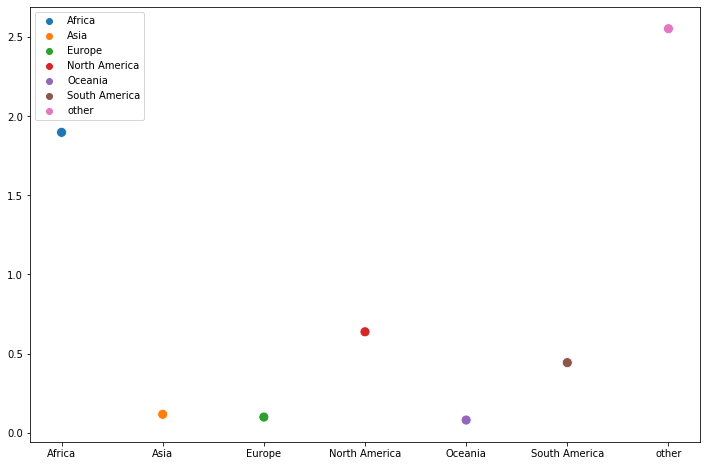

In [ ]:
#continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'Other']
values = list(new_group_df2[1990])
fig = plt.gcf()
fig.set_size_inches(12, 8)
#matplotlib.pyplot.scatter(continents,values, cmap='jet')
g =sns.scatterplot(x=continents, y=values,
              hue=continents, s=100);

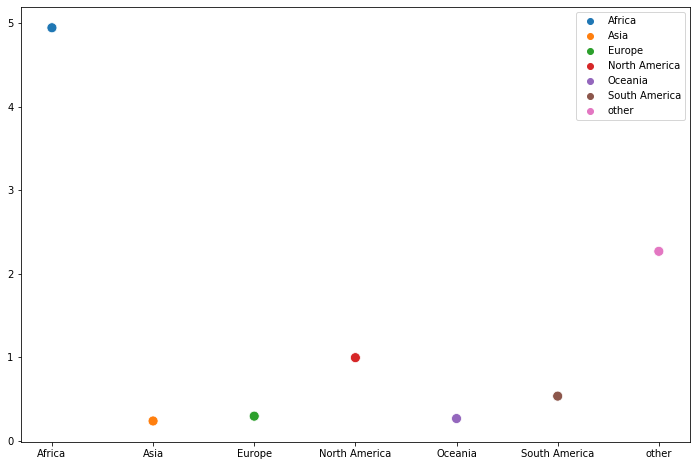

In [ ]:
#continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'Other']
values1 = list(new_group_df2['2010'])
fig = plt.gcf()
fig.set_size_inches(12, 8)
#matplotlib.pyplot.scatter(continents,values1)
g =sns.scatterplot(x=continents, y=values1,
              hue=continents, s=100);